# Exploratory Text Analysis

In this notebook, we will explore the text data of the dataset, Checking the frequency of messages, intents and words. Will be a basic text analysis.

## 1. Import

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Load data

In [2]:
phrase = pd.read_parquet('../data/raw/raw-phrase.parquet')
target = pd.read_parquet('../data/raw/raw-target.parquet')

data = pd.concat([phrase, target], axis = 1)	
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   phrase  434 non-null    object
 1   intent  434 non-null    object
dtypes: object(2)
memory usage: 6.9+ KB


## 3. Explore data

### 3.1 Data overview

In [3]:
data.sample(10)

,phrase,intent
393,Como solicitar consignado?,quero_emprestimo
150,O que fazer para liberar aplicativo,desbloquear_app
261,Realizar uma transferência,realizar_transferencia
313,Queria recuperar a senha para entrar na minha ...,alterar_senha
366,Pode me mandar o boleto para pagar,quero_boleto
81,Não consigo baixar app,baixar_app
56,Gostaria de saber qual o número do meu celular...,alterar_dados_cadastrais
378,Quero um cartão de crédito,quero_cartao
347,Quero solicitar renovação de dívida,solicitar_acordo
343,Eu quero liquidar minhas dívidas com o banco,solicitar_acordo


### 3.2 Intents Distribution

In [4]:
# count the number of phrases per intent
intents_count = data.intent.value_counts()

print('Number of different intents:', len(intents_count.index))
print('Number of phrases:', intents_count.sum())
print('Median number of phrases:', intents_count.median())

Number of different intents: 24
Number of phrases: 434
Median number of phrases: 16.5


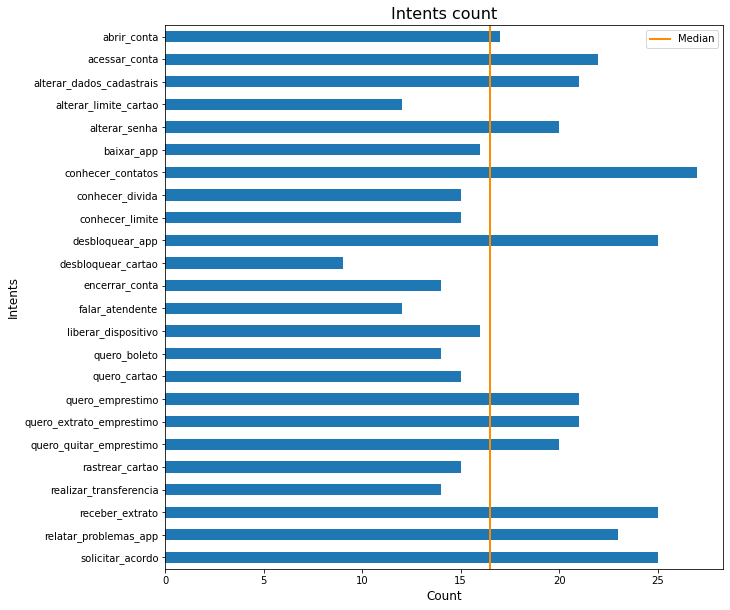

In [5]:
intents_count.sort_index(ascending = False).plot.barh(figsize = (10, 10))
plt.axvline(intents_count.median(), color = 'darkorange', linewidth = 2)
plt.title('Intents count', fontsize = 16)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Intents', fontsize = 12)
plt.legend(['Median'])
plt.show()

How is possible to note the dataset has unbalanced intents with different numbers of examples. So is necessary to balance our dataset with some techniques. In this case, we will use the technique of oversampling and data augmentation to generate more examples. Oversampling will be used when we will make the train data.

### 3.3 Phrases Distribution

In [6]:
data.phrase.value_counts()

O que fazer para liberar aplicativo                         4
Estou tentando desbloquear meu aplicativo no meu celular    2
Aplicativo está bloqueado                                   2
Quero alterar o limite do meu cartão de crédito             2
Quero desbloquear meu aplicativo                            2
                                                           ..
Qual o limite que vai vir no cartão?                        1
Quero saber quanto posso gastar no cartão                   1
Saber quanto tenho de limite                                1
Quero saber qual é meu limite                               1
Saber desconto do empréstimo                                1
Name: phrase, Length: 423, dtype: int64

In [7]:
data.query('phrase == "O que fazer para liberar aplicativo"')

,phrase,intent
150,O que fazer para liberar aplicativo,desbloquear_app
158,O que fazer para liberar aplicativo,desbloquear_app
215,O que fazer para liberar aplicativo,liberar_dispositivo
331,O que fazer para liberar aplicativo,relatar_problemas_app


As we can see above, we have identical phrases with different intents. This is not a good situation because it can confuse our model. We will drop similar phrases. We need to drop these rows.

### 3.4 Most used words

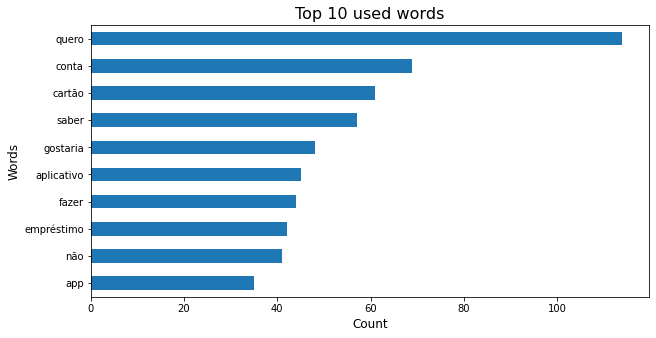

In [8]:
# listing words
words = data.phrase.str.lower().apply(str.split).sum()

# reading portuguese stopwords
stopwords = open('../data/external/stopwords.csv', 'r').read().split('\n')

# removing stopwords
words = pd.Series(filter(lambda word: word not in stopwords, words))

top_ten_words = words.value_counts().head(10)
top_ten_words.plot.barh(figsize = (10, 5)).invert_yaxis()
plt.title('Top 10 used words', fontsize = 16)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Words', fontsize = 12)
plt.show()

The portuguese verb 'Quero' (Want) is the most user word in the dataset. So we can infer that the majority of intents are about Want something such as credit card, bills and other stuff.

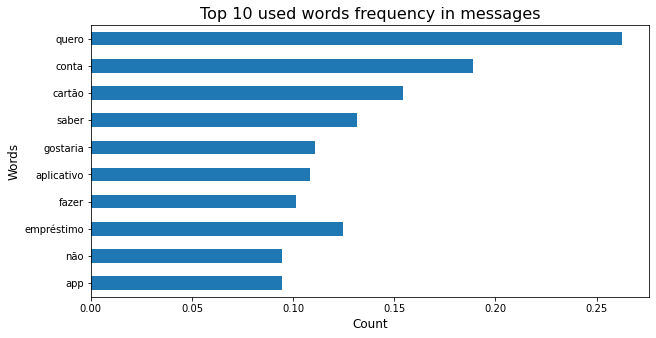

In [9]:
def word_frequency(word):
    return data.phrase.str.lower().apply(lambda message: word in message).sum() / data.shape[0]
    
top_ten_words_frequency = top_ten_words.index.to_series().apply(word_frequency)

top_ten_words_frequency.plot.barh(figsize = (10, 5)).invert_yaxis()
plt.title('Top 10 used words frequency in messages', fontsize = 16)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Words', fontsize = 12)
plt.show()

The verb 'Quero' (Want) appear in 26% of the dataset messages, followed by 'Conta' (Account) and 'Cartão' (Credit Card).